In [1]:
# coding: utf-8
import numpy as np


class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))


class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 重みとバイアスの初期化
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # レイヤの生成
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]

        # すべての重みをリストにまとめる
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x


x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s)

[[ 2.14712955 -1.47928507  0.3327347 ]
 [ 3.18001062 -2.26394751  1.69270486]
 [ 2.88681818 -2.00835557  1.2220095 ]
 [ 2.22955265 -1.51952007  0.3831079 ]
 [ 3.44709457 -2.41608242  1.90845262]
 [ 2.14005538 -1.34290284 -0.06566851]
 [ 2.80162741 -1.87213315  0.89139663]
 [ 2.34362903 -1.61514289  0.57603209]
 [ 2.85000079 -1.95084997  1.08373344]
 [ 1.98668642 -1.29256717 -0.09982143]]


# ニューラルネットワークで問題を解く（スパイラルデータセット）


x (300, 2)
t (300, 3)
[ 0.39775648 -0.04230585] [1 0 0]


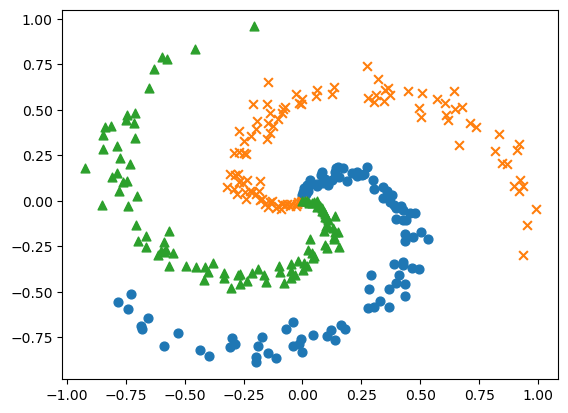

In [6]:
# coding: utf-8
import sys

sys.path.append("..")  # 親ディレクトリのファイルをインポートするための設定
from dataset import spiral
import matplotlib.pyplot as plt


x, t = spiral.load_data()
print("x", x.shape)  # (300, 2)
print("t", t.shape)  # (300, 3)
print(x[40], t[40])  # print row data and label to check how the content looks like.

# データ点のプロット
N = 100
CLS_NUM = 3
markers = ["o", "x", "^"]
for i in range(CLS_NUM):
    plt.scatter(
        x[i * N : (i + 1) * N, 0], x[i * N : (i + 1) * N, 1], s=40, marker=markers[i]
    )
plt.show()

In [ ]:
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLyaerNet:
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        I, H, O = input_size, hidden_size, output_size

        # initialize weights and biases
        W1 = 0.01 * np.random.rand(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(0)

        # generate layers
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
        self.loss_layer = SoftmaxWithLoss()

        # collect all weights and grads into a list
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

| epoch 1 |  iter 10 / 10 | loss 1.13
| epoch 2 |  iter 10 / 10 | loss 1.13
| epoch 3 |  iter 10 / 10 | loss 1.12
| epoch 4 |  iter 10 / 10 | loss 1.12
| epoch 5 |  iter 10 / 10 | loss 1.11
| epoch 6 |  iter 10 / 10 | loss 1.14
| epoch 7 |  iter 10 / 10 | loss 1.16
| epoch 8 |  iter 10 / 10 | loss 1.11
| epoch 9 |  iter 10 / 10 | loss 1.12
| epoch 10 |  iter 10 / 10 | loss 1.13
| epoch 11 |  iter 10 / 10 | loss 1.12
| epoch 12 |  iter 10 / 10 | loss 1.11
| epoch 13 |  iter 10 / 10 | loss 1.09
| epoch 14 |  iter 10 / 10 | loss 1.08
| epoch 15 |  iter 10 / 10 | loss 1.04
| epoch 16 |  iter 10 / 10 | loss 1.03
| epoch 17 |  iter 10 / 10 | loss 0.96
| epoch 18 |  iter 10 / 10 | loss 0.92
| epoch 19 |  iter 10 / 10 | loss 0.92
| epoch 20 |  iter 10 / 10 | loss 0.87
| epoch 21 |  iter 10 / 10 | loss 0.85
| epoch 22 |  iter 10 / 10 | loss 0.82
| epoch 23 |  iter 10 / 10 | loss 0.79
| epoch 24 |  iter 10 / 10 | loss 0.78
| epoch 25 |  iter 10 / 10 | loss 0.82
| epoch 26 |  iter 10 / 10 | loss 

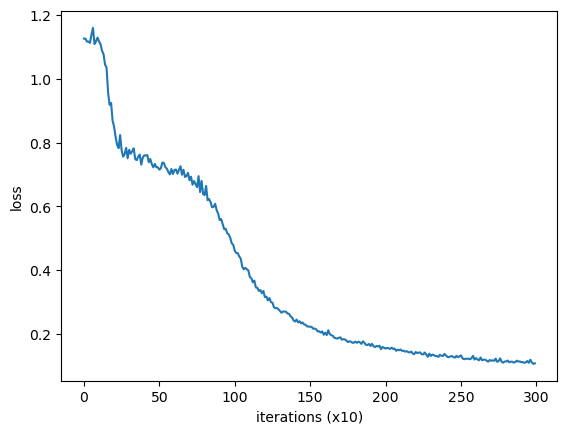

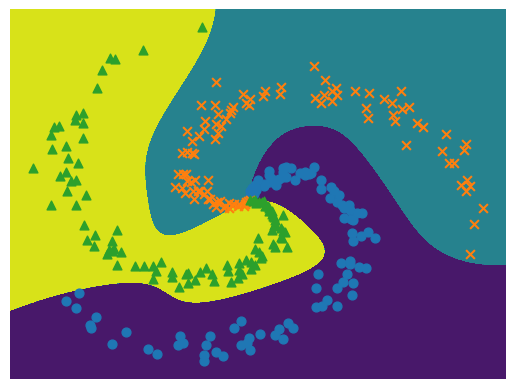

In [8]:
# coding: utf-8
import sys

sys.path.append("..")  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet


# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters * batch_size : (iters + 1) * batch_size]
        batch_t = t[iters * batch_size : (iters + 1) * batch_size]

        # 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期的に学習経過を出力
        if (iters + 1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(
                "| epoch %d |  iter %d / %d | loss %.2f"
                % (epoch + 1, iters + 1, max_iters, avg_loss)
            )
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 学習結果のプロット
plt.plot(np.arange(len(loss_list)), loss_list, label="train")
plt.xlabel("iterations (x10)")
plt.ylabel("loss")
plt.show()

# 境界領域のプロット
h = 0.001
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis("off")

# データ点のプロット
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ["o", "x", "^"]
for i in range(CLS_NUM):
    plt.scatter(
        x[i * N : (i + 1) * N, 0], x[i * N : (i + 1) * N, 1], s=40, marker=markers[i]
    )
plt.show()